<a href="https://colab.research.google.com/github/filmerxyz/JSTP-22_SkinDiseaseClassificationUsingMachineLearning/blob/master/HAM10000_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis for HAM10000**
https://github.com/hoang-ho/Skin_Lesions_Classification_DCNNs/blob/master/Skin_Cancer_EDA.ipynb

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns

from skimage.io import imread

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Clone Data

In [2]:
!git clone https://github.com/EvilPickle-PCSHSPT/ham10000-with-one-image-folder

fatal: destination path 'ham10000-with-one-image-folder' already exists and is not an empty directory.


In [3]:
base_skin_dir = '/content/ham10000-with-one-image-folder'
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv')) # load in the data
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [0]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [0]:
lesion_type_dict = {
    'nv': 'Melanocytic_nevi',
    'mel': 'melanoma',
    'bkl': 'Benign_keratosis-like_lesions',
    'bcc': 'Basal_cell_carcinoma',
    'akiec': 'Actinic_keratoses',
    'vasc': 'Vascular_lesions',
    'df': 'Dermatofibroma'
}

lesion_danger = {
    'nv': 0, # 0 for benign
    'mel': 1, # 1 for malignant
    'bkl': 0, # 0 for benign
    'bcc': 1, # 1 for malignant
    'akiec': 1, # 1 for malignant
    'vasc': 0,
    'df': 0
}

In [0]:
skin_df["path"] = skin_df["image_id"].map(imageid_path_dict.get) # map image_id to the path of that image

In [0]:
skin_df["cell_type"] = skin_df["dx"].map(lesion_type_dict.get) # map dx to type of lesion

In [8]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/ham10000-with-one-image-folder/HAM100...,Benign_keratosis-like_lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/ham10000-with-one-image-folder/HAM100...,Benign_keratosis-like_lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/ham10000-with-one-image-folder/HAM100...,Benign_keratosis-like_lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/ham10000-with-one-image-folder/HAM100...,Benign_keratosis-like_lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/ham10000-with-one-image-folder/HAM100...,Benign_keratosis-like_lesions


In [0]:
skin_df["Malignant"] = skin_df["dx"].map(lesion_danger.get)

In [10]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,Malignant
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/ham10000-with-one-image-folder/HAM100...,Benign_keratosis-like_lesions,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/ham10000-with-one-image-folder/HAM100...,Benign_keratosis-like_lesions,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/ham10000-with-one-image-folder/HAM100...,Benign_keratosis-like_lesions,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/ham10000-with-one-image-folder/HAM100...,Benign_keratosis-like_lesions,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/ham10000-with-one-image-folder/HAM100...,Benign_keratosis-like_lesions,0


In [0]:
skin_df["cell_type_idx"] = pd.Categorical(skin_df["cell_type"]).codes # give each cell type a category id

In [12]:
skin_df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,Malignant,cell_type_idx
2755,HAM_0001183,ISIC_0027846,bcc,histo,65.0,female,back,/content/ham10000-with-one-image-folder/HAM100...,Basal_cell_carcinoma,1,1
6556,HAM_0006627,ISIC_0029511,nv,follow_up,50.0,male,lower extremity,/content/ham10000-with-one-image-folder/HAM100...,Melanocytic_nevi,0,4
7841,HAM_0006418,ISIC_0033599,nv,histo,65.0,female,back,/content/ham10000-with-one-image-folder/HAM100...,Melanocytic_nevi,0,4


# Benign vs Malignant

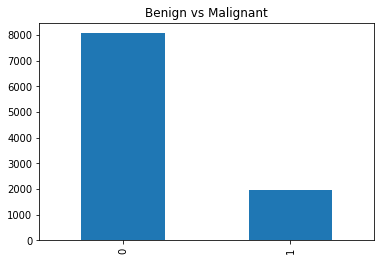

In [13]:
skin_df["Malignant"].value_counts().plot(kind="bar", title="Benign vs Malignant")

# Counts for each type of Lesions

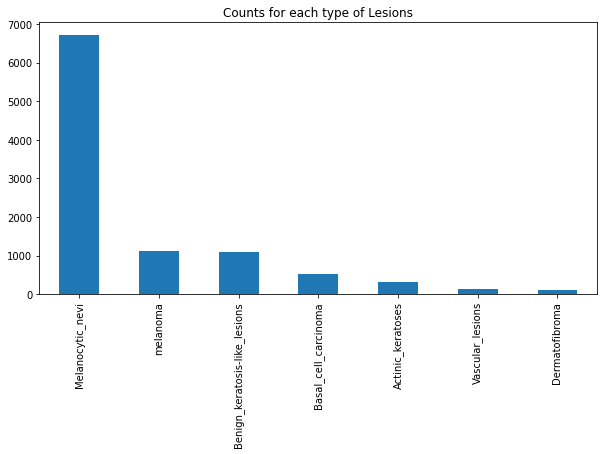

In [14]:
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
skin_df["cell_type"].value_counts().plot(kind="bar", ax=ax1, title="Counts for each type of Lesions") # plot a graph counting the number of each cell type

# Location of Lesions

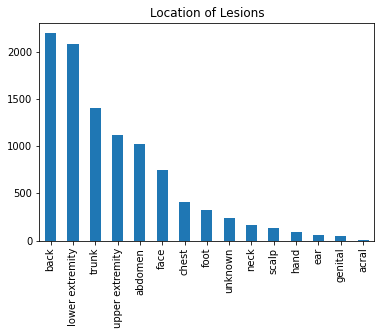

In [15]:
# let's see where lesions are mostly located
skin_df["localization"].value_counts().plot(kind='bar', title="Location of Lesions")

# Treatment received

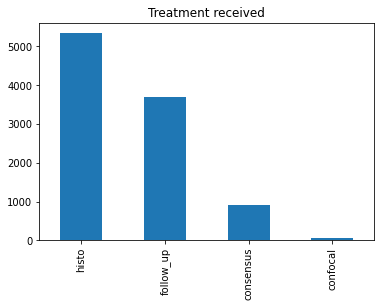

In [16]:
skin_df["dx_type"].value_counts().plot(kind='bar', title="Treatment received")

# Age

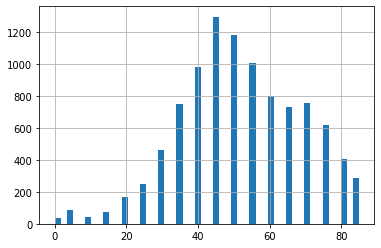

In [17]:
skin_df["age"].hist(bins=50)

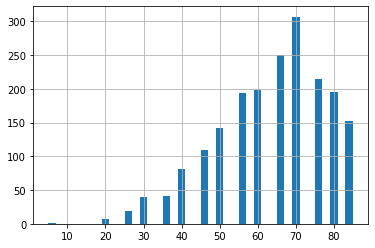

In [18]:
skin_df[skin_df["Malignant"] == 1]["age"].hist(bins=40)

# Sex

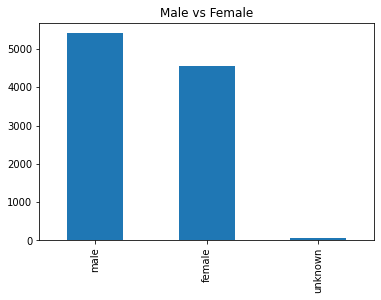

In [19]:
skin_df["sex"].value_counts().plot(kind="bar", title="Male vs Female")

# Male vs Female. Malignant Cases

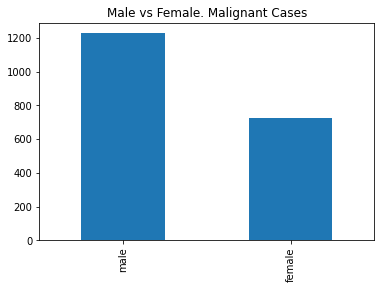

In [20]:
skin_df[skin_df["Malignant"] == 1]["sex"].value_counts().plot(kind="bar", title="Male vs Female. Malignant Cases")

In [0]:
skin_df["image"] = skin_df["path"].map(imread) # read the image to array values

In [22]:
# let's see what is the shape of each value in the image column
skin_df["image"].map(lambda x: x.shape).value_counts()

(450, 600, 3)    10015
Name: image, dtype: int64

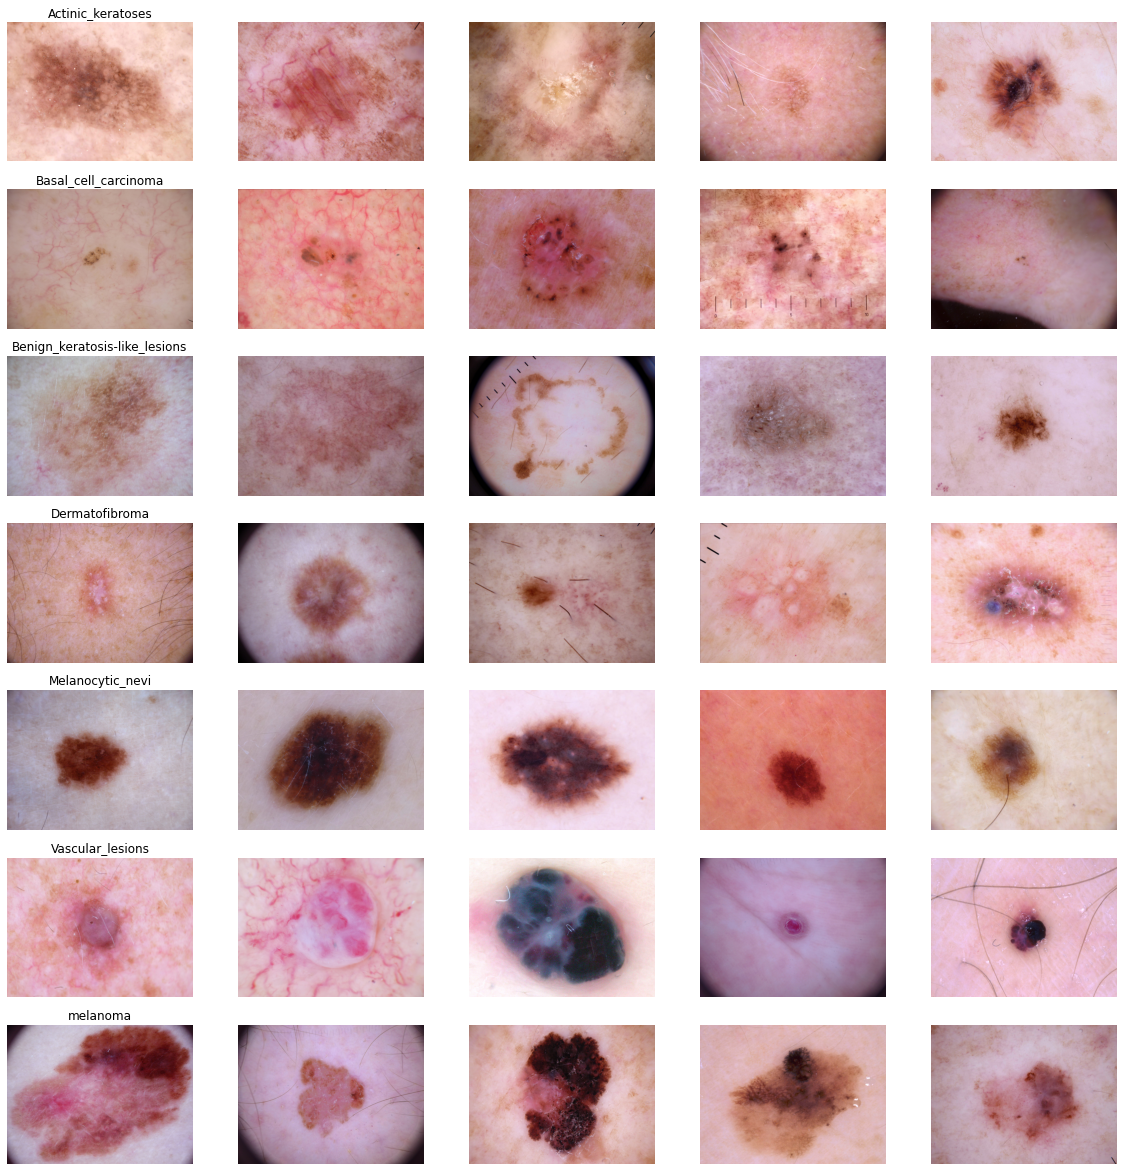

In [23]:
# let's have a look at the image data

n_samples = 5 # choose 5 samples for each cell type
fig, m_axs = plt.subplots(7, n_samples, figsize=(4*n_samples, 3 * 7))

for n_axs, (type_name, type_rows) in zip(m_axs, skin_df.sort_values(["cell_type"]).groupby("cell_type")):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=0).iterrows()):
        c_ax.imshow(c_row["image"])
        c_ax.axis("off")
fig.savefig("category_samples.png", dpi=300)

# Get Average Color Information
Here we get and normalize all of the color channel information

In [24]:
# create a pandas dataframe to store mean value of Red, Blue and Green for each picture
rgb_info_df = skin_df.apply(lambda x: pd.Series({'{}_mean'.format(k): v for k, v 
                                                 in zip(["Red", "Blue", "Green"], 
                                                        np.mean(x["image"], (0, 1)))}), 1)


gray_col_vec = rgb_info_df.apply(lambda x: np.mean(x), 1) # take the mean value across columns of rgb_info_df
for c_col in rgb_info_df.columns:
    rgb_info_df[c_col] = rgb_info_df[c_col]/gray_col_vec 
rgb_info_df["Gray_mean"] = gray_col_vec
rgb_info_df.sample(3)

,Red_mean,Blue_mean,Green_mean,Gray_mean
3863,1.433042,0.808020,0.758938,156.539399
8294,1.256840,0.854947,0.888213,148.839167
4732,1.245805,0.845543,0.908652,174.069260


In [0]:
for c_col in rgb_info_df.columns:
    skin_df[c_col] = rgb_info_df[c_col].values

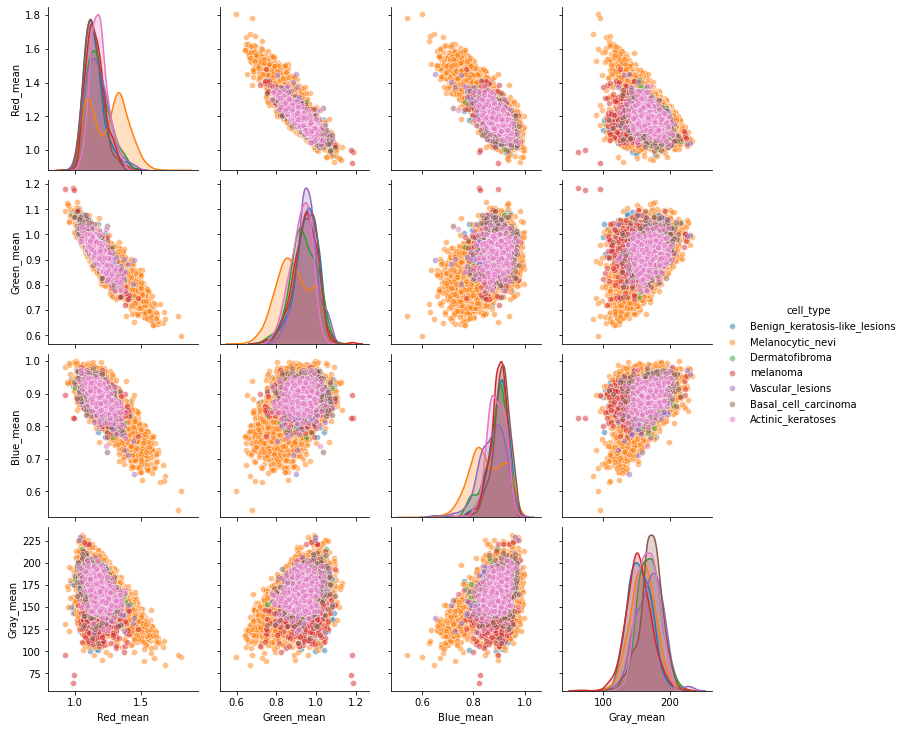

In [26]:
# let's draw a plot showing the distribution of different cell types over colors!
sns.pairplot(skin_df[["Red_mean", "Green_mean", "Blue_mean", "Gray_mean", "cell_type"]], 
             hue="cell_type", plot_kws = {"alpha": 0.5})